## **Projeto GRUPO 4 - Estatística**

Prof° Gabriel

**Participantes:**

* Amanda
* Daniel Custodio
* Márcia
* Mariah Moreira

### **_Resumo:_**

A análise busca identificar a distribuição salarial entre diversos níveis correlacionando com o tipo de moeda o ano em que foi aplicado, sendo que a função principal está atrelada a área de ciência de dados.

_fonte:_

Kaggle - Data Science Salaries 2023 💸

>Salários de diferentes áreas de ciência de dados no domínio da ciência de dados;

### _Estrutura da consulta_
**10 colunas:**
1. Ano
2. Nivel_Experiencia
3. Tipo_Emprego
4. Cargo,Salario
5. Moeda
6. Salario_USD
7. País_Residencia
8. Trabalho_Remoto
9. País_Empregador
10. Tamanho_Empresa


https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Biblioteca para formatação do eixo X e Y
import re
import geopandas as gpd

Leitura da Base de dados

In [3]:
# Criando datafrane
bd_data = '../data/ds_salaries.csv'

dados = pd.read_csv(bd_data)
##dados = dados.drop(dados.columns[0], axis=1) #retirando a coluna ID

Análise e Tratamento da Base

In [4]:
# Verificando o shape do dataframe
dados.shape

(3755, 11)

In [5]:
# Função que cria data frames com base em índices de colunas
def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [6]:
def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

In [7]:
#Verificando nomes das colunas
df_1 = cria_df([0, 12])
df_1.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
# Renomeando as colunas
novos_nomes1 = ['Ano','Nivel_Experiencia','Tipo_Emprego','Cargo','Salario','Moeda','Salario_USD','País_Residencia','Trabalho_Remoto','País_Empregador','Tamanho_Empresa']

renomeia_coluna_df(df_1,novos_nomes1)
df_1.head()

,ano,nivel_experiencia,tipo_emprego,cargo,salario,moeda,salario_usd,país_residencia,trabalho_remoto,país_empregador,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [9]:
# Info do df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                3755 non-null   int64 
 1   nivel_experiencia  3755 non-null   object
 2   tipo_emprego       3755 non-null   object
 3   cargo              3755 non-null   object
 4   salario            3755 non-null   int64 
 5   moeda              3755 non-null   object
 6   salario_usd        3755 non-null   int64 
 7   país_residencia    3755 non-null   object
 8   trabalho_remoto    3755 non-null   int64 
 9   país_empregador    3755 non-null   object
 10  tamanho_empresa    3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
# Valores nulos do df
df_1.isnull().sum()

ano                  0
nivel_experiencia    0
tipo_emprego         0
cargo                0
salario              0
moeda                0
salario_usd          0
país_residencia      0
trabalho_remoto      0
país_empregador      0
tamanho_empresa      0
dtype: int64

In [11]:
# Estatísticas decritivas do df
df_1.describe()

,ano,salario,salario_usd,trabalho_remoto
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [12]:
# Verificando a quantidade de valores unicos para cada coluna
num_unique_values = df_1.nunique()
unique_values_df = pd.DataFrame({'Coluna': num_unique_values.index, 'Valores Únicos': num_unique_values.values})
print(unique_values_df)

               Coluna  Valores Únicos
0                 ano               4
1   nivel_experiencia               4
2        tipo_emprego               4
3               cargo              93
4             salario             815
5               moeda              20
6         salario_usd            1035
7     país_residencia              78
8     trabalho_remoto               3
9     país_empregador              72
10    tamanho_empresa               3


1) Distribuição da Base por nível de experiencia


In [13]:
# Verificando os tipos de experiencia
tipos_exp = df_1['nivel_experiencia'].unique()
print(tipos_exp)

['SE' 'MI' 'EN' 'EX']


EN = Entry-level / Junior.

MI = Mid-level / Pleno.

SE = Senior-level / Senior.

EX = Executive-level / Diretor.

In [14]:
# Alterando os valores do nível de experiencia pra melhor compreensão
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('EN','Junior')
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('MI','Pleno')
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('SE','Senior')
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('EX','Diretor')

In [15]:
tipos_exp = df_1['nivel_experiencia'].unique()
print(tipos_exp)

['Senior' 'Pleno' 'Junior' 'Diretor']


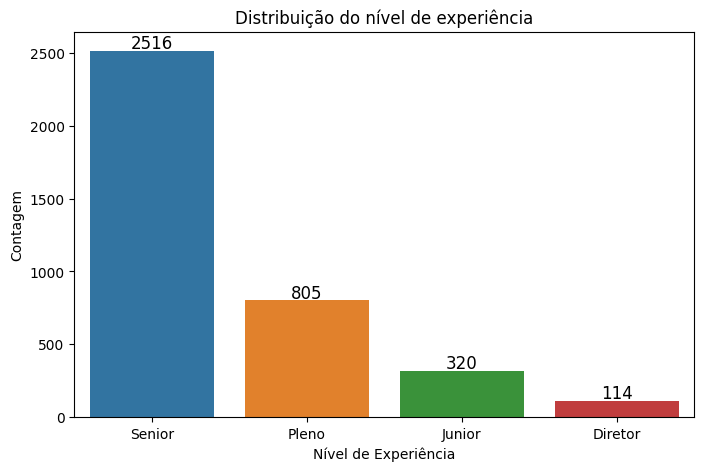

In [16]:
# Plotando gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_1, x='nivel_experiencia')
plt.title('Distribuição do nível de experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Contagem')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show() #ou ; no final

- A maior parte da base respondente e composta por pessoas do nível Senior e a menor parte por pessoas com cargo de liderança.

2) Distribuição da Base por tipo de emprego


In [17]:
# Tipo do emprego
tipos_emp = df_1['tipo_emprego'].unique()
print(tipos_emp)

['FT' 'CT' 'FL' 'PT']


PT : Part-time / Meio Periodo

FT : Full-time / Tempo Integral

CT : Contract / Contrato

FL : Freelance

In [18]:
# Alterando os valores do tipo_emprego
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('PT','Meio Periodo')
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('FT','Tempo Integral')
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('CT','Contrato')
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('FL','Freelance')

In [19]:
tipos_emp = df_1['tipo_emprego'].unique()
print(tipos_emp)

['Tempo Integral' 'Contrato' 'Freelance' 'Meio Periodo']


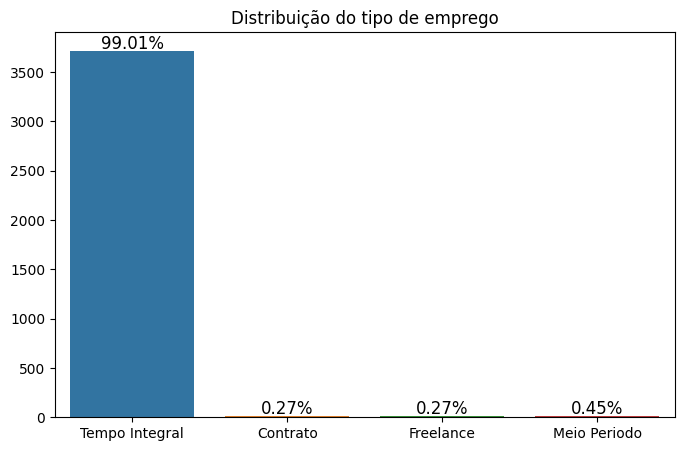

In [20]:
# Plotando grafico de barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_1, x='tipo_emprego')
plt.title('Distribuição do tipo de emprego')
plt.xlabel('')
plt.ylabel('')

total = len(df_1)  # Total de observações
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points');

- A maior parte dos respondentes trabalham em regime de tempo integral


In [21]:
df_sem_USBR = df_1.loc[df_1['país_empregador'] != 'US']
df_sem_USBR = df_1.loc[df_1['país_empregador'] != 'BR']
print(df_sem_USBR['país_empregador'].unique())

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'PT' 'RU' 'TH' 'HR' 'VN'
 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL' 'AR'
 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO' 'PH'
 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL' 'MD'
 'MT']


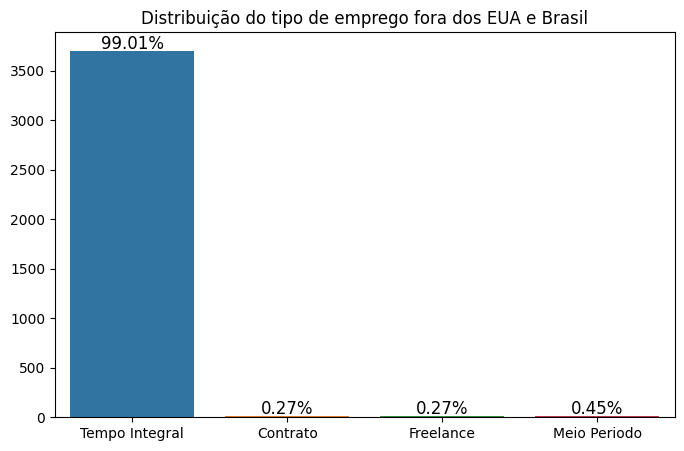

In [22]:
# Plotando gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_sem_USBR, x='tipo_emprego')
plt.title('Distribuição do tipo de emprego fora dos EUA e Brasil')
plt.xlabel('')
plt.ylabel('')

total = len(df_sem_USBR)  # Total de observações
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points');

- Para entender melhor a disposição do mercado de trabalho, foi análisado o tipo de emprego desconsiderando os EUA que compões a maior parte dos respondentes.


['BR']


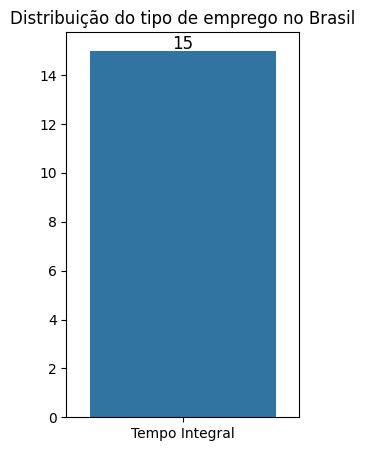

In [23]:
df_BR = df_1.loc[df_1['país_empregador'] == 'BR']
print(df_BR['país_empregador'].unique())

plt.figure(figsize=(3, 5))
ax = sns.countplot(data=df_BR, x='tipo_emprego')
plt.title('Distribuição do tipo de emprego no Brasil')
plt.xlabel('')
plt.ylabel('')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points');

- Também foi analisado o tipo de emprego dos respondentes que residem no Brasil, no entanto a amostra é pequena e 100% da base trabalha em tempo integral

3) Distribuição do Salário em Dolares

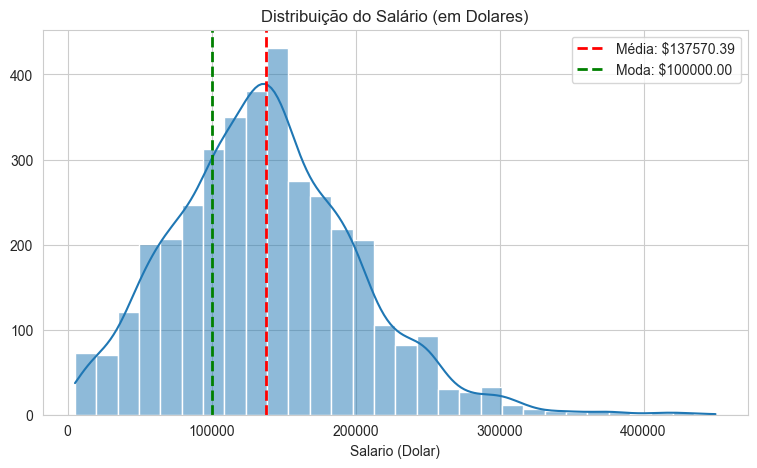

In [24]:
# Estilo
sns.set_style("whitegrid")

plt.figure(figsize=(20, 5))
# Distribuição do Salário em Dolares
plt.subplot(1, 2, 1)
ax = sns.histplot(df_1['salario_usd'], kde=True, bins=30)
plt.title('Distribuição do Salário (em Dolares)')
plt.xlabel('Salario (Dolar)')
plt.ylabel('')

# Calcula a média dos salários
media_salario = df_1['salario_usd'].mean()

# Calcula a moda dos salários
moda_salario = df_1['salario_usd'].mode().iloc[0]

# Adiciona a média no gráfico
plt.axvline(media_salario, color='red', linestyle='dashed', linewidth=2, label=f'Média: ${media_salario:.2f}')
# Adiciona a moda no gráfico
plt.axvline(moda_salario, color='green', linestyle='dashed', linewidth=2, label=f'Moda: ${moda_salario:.2f}')
plt.legend()

- O grafico apresenta uma distribuição normal com maior pico proximo a 140mil e uma pequena amostra com salário superior a 300mil. 

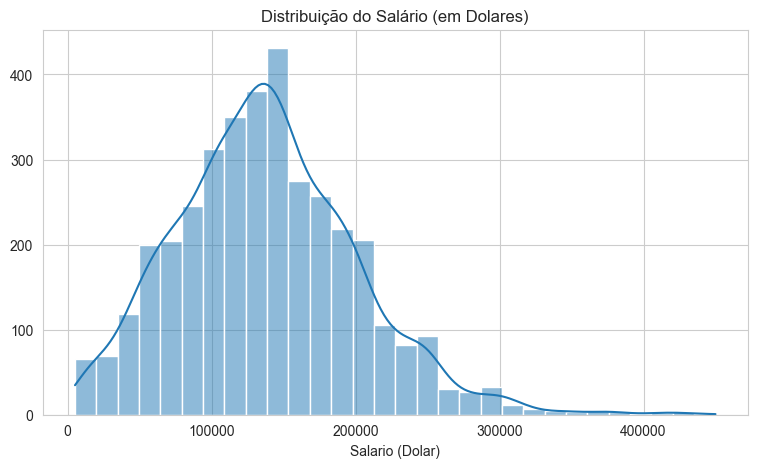

In [25]:
# Estilo
sns.set_style("whitegrid")

plt.figure(figsize=(20, 5))
# Distribuição do Salário em Dolares
plt.subplot(1, 2, 1)
sns.histplot(df_sem_USBR['salario_usd'], kde=True, bins=30)
plt.title('Distribuição do Salário (em Dolares)')
plt.xlabel('Salario (Dolar)')
plt.ylabel('');

- A distribuição do sálario em países além do EUA e BR seguem a mesma linha de tendencia da amostra como um todo

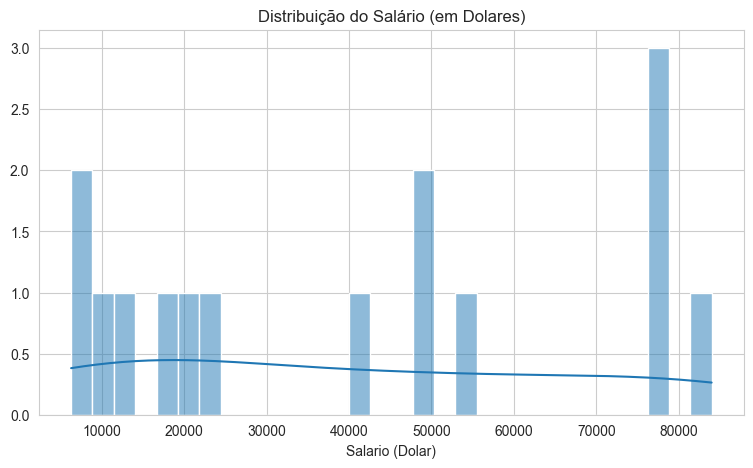

In [26]:
# Estilo
sns.set_style("whitegrid")

plt.figure(figsize=(20, 5))
# Distribuição do Salário em Dolares
plt.subplot(1, 2, 1)
sns.histplot(df_BR['salario_usd'], kde=True, bins=30)
plt.title('Distribuição do Salário (em Dolares)')
plt.xlabel('Salario (Dolar)')
plt.ylabel('');

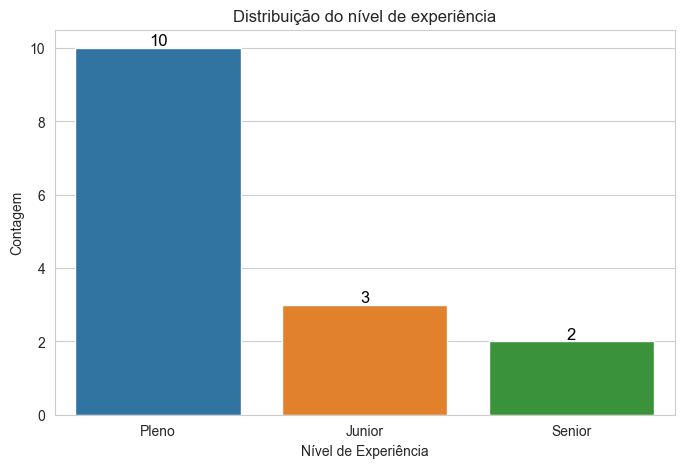

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_BR, x='nivel_experiencia')
plt.title('Distribuição do nível de experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Contagem')

# Adicione números inteiros sobre as barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

- Como a amostra de respondentes no Brasil é pequena e com cargos espalhados é inválido analisar a distribuição.

4) Média salarial por cargo

In [28]:
count_cargos = df_1['cargo'].value_counts()

top_5_cargos = count_cargos.head(5)
print(top_5_cargos)

cargo
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Name: count, dtype: int64


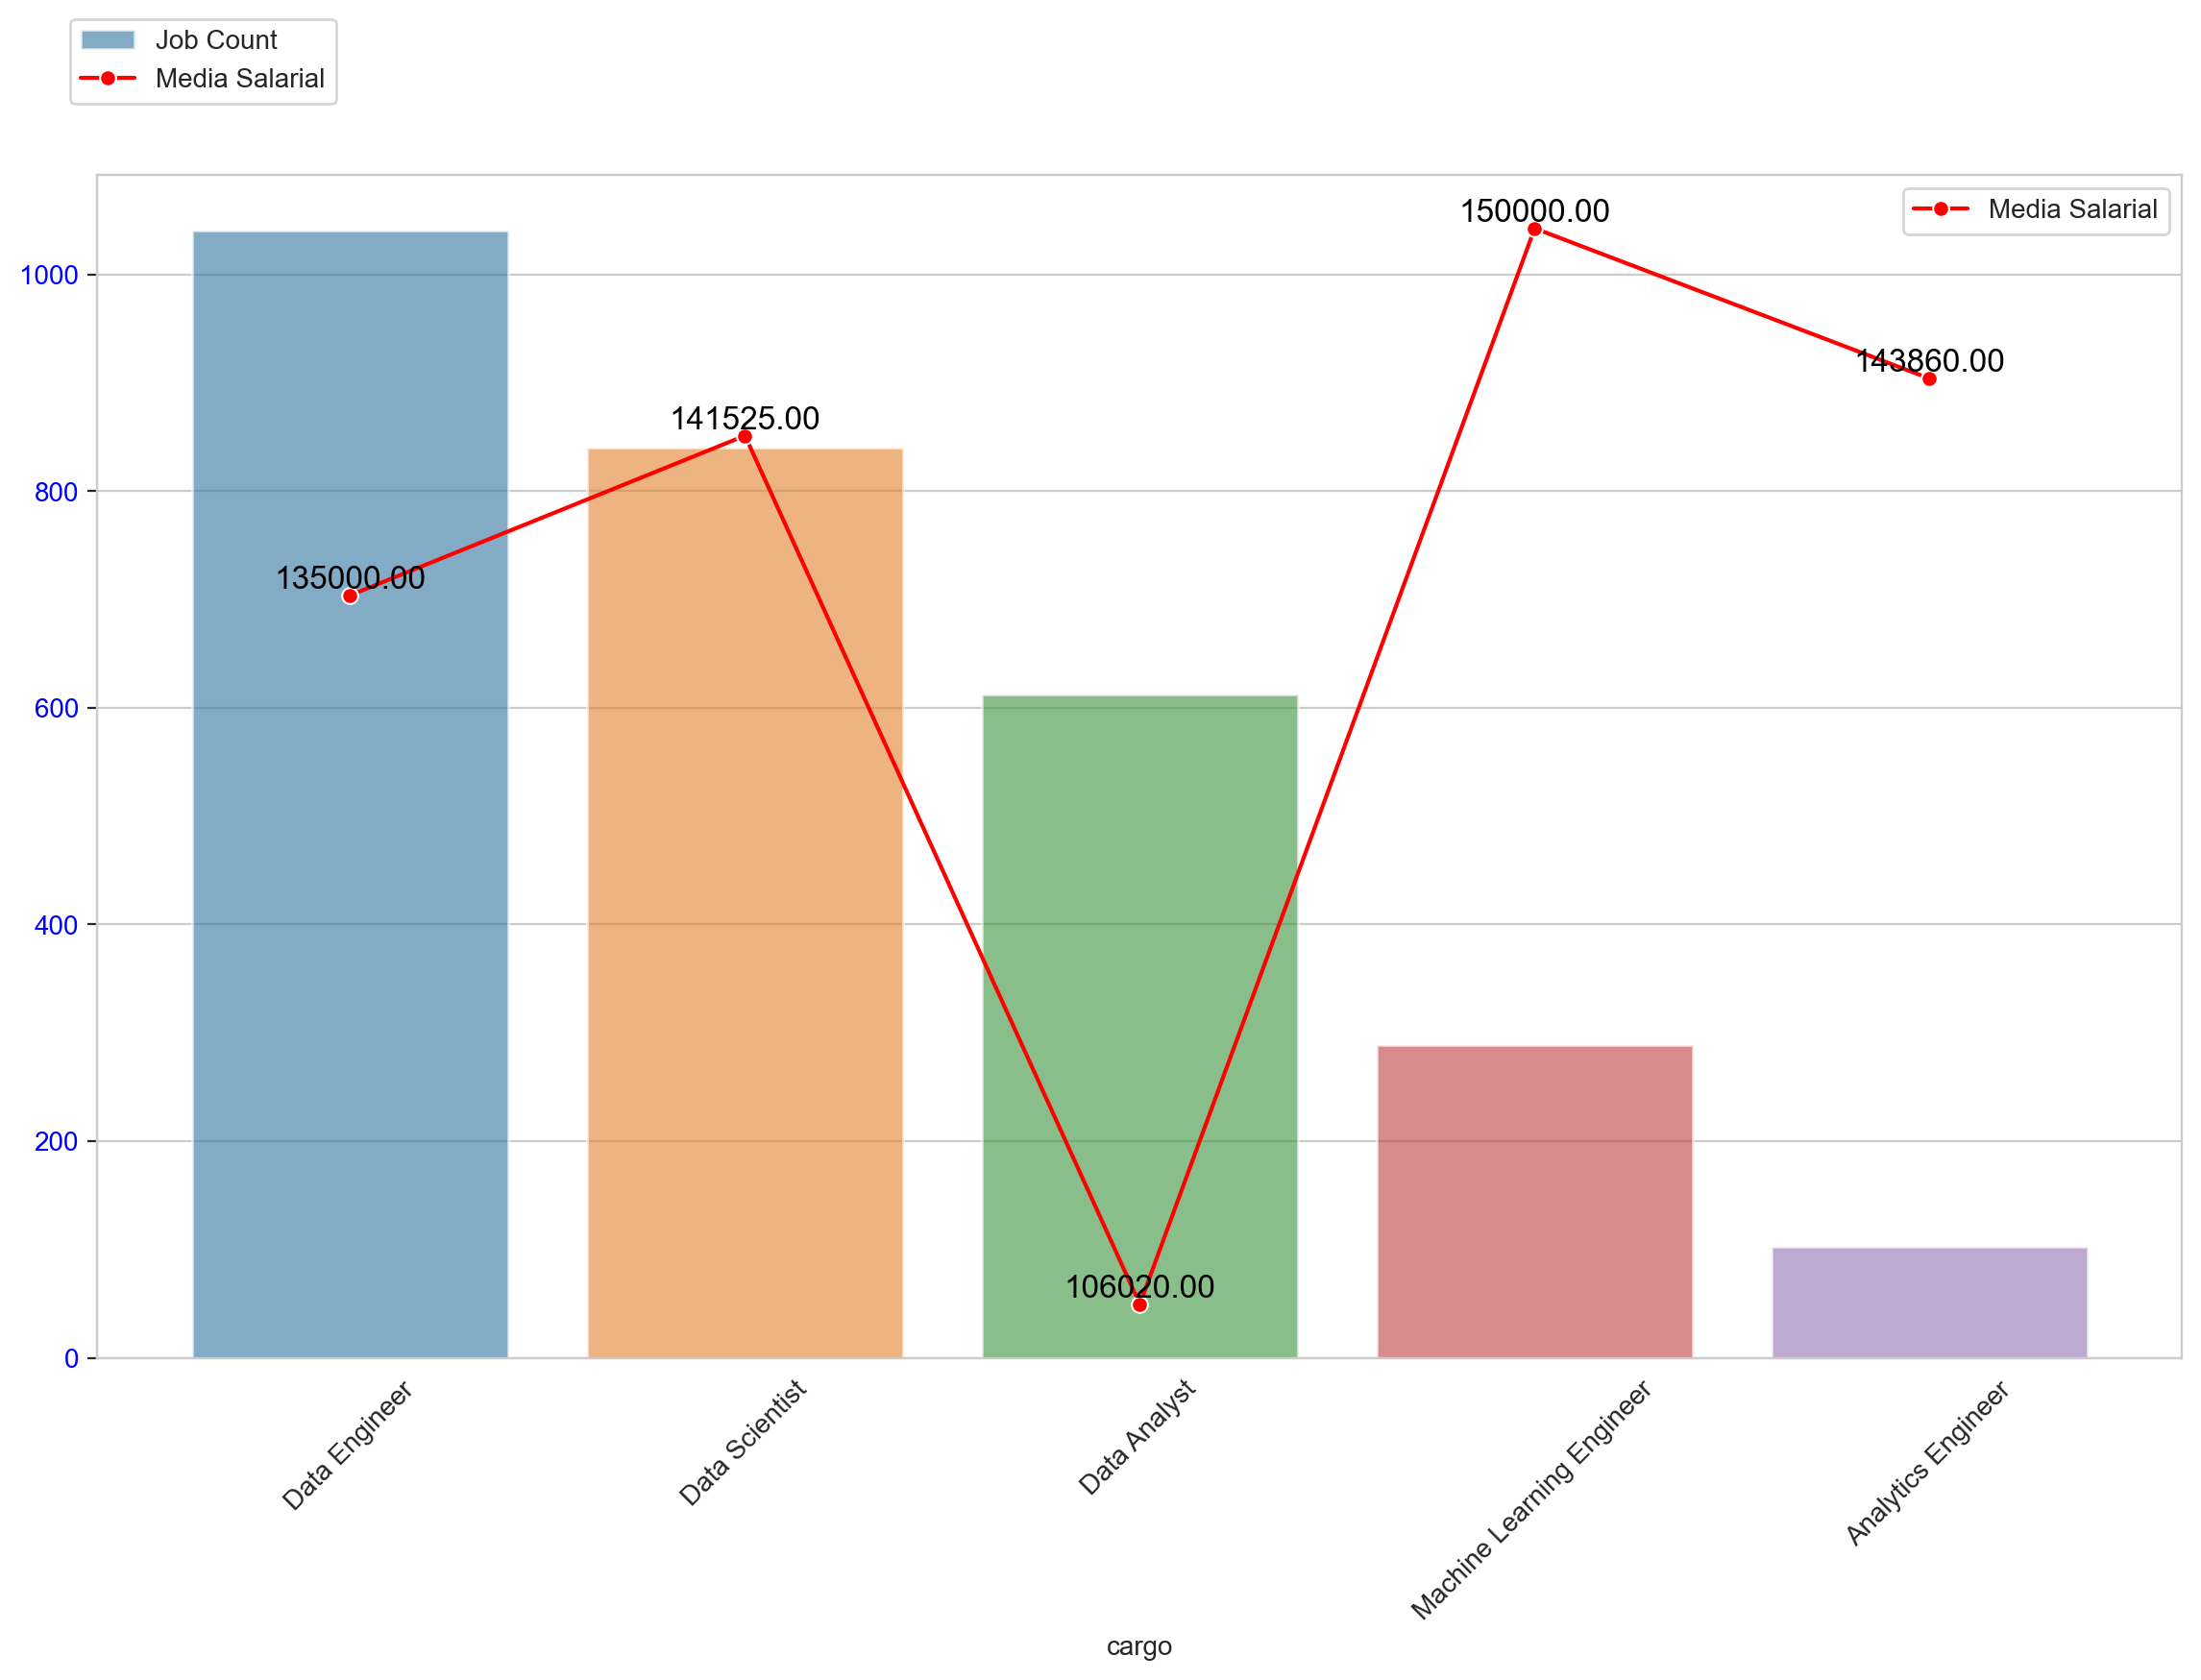

In [29]:
top_5_cargos = df_1['cargo'].value_counts().nlargest(5).reset_index()
top_5_cargos.columns = ['cargo', 'count']
media_salarial = df_1[df_1['cargo'].isin(top_5_cargos['cargo'])].groupby('cargo')['salario_usd'].median().reset_index()
top_5_cargos_salario = pd.merge(top_5_cargos, media_salarial, on='cargo').sort_values('count', ascending=False)



fig, ax1 = plt.subplots(figsize=(14, 8), dpi=200)
sns.barplot(x='cargo', y='count', data=top_5_cargos_salario, ax=ax1, alpha=0.6, label='Job Count')
ax1.set_ylabel('', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plotar o salário médio
ax2 = ax1.twinx()
sns.lineplot(x='cargo', y='salario_usd', data=top_5_cargos_salario, ax=ax2, color='r', marker='o', label='Media Salarial')
ax2.set_ylabel('', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Remover o eixo Y do segundo eixo
ax2.set_yticks([])

# Adicionar os valores da mediana acima das bolinhas
for index, row in top_5_cargos_salario.iterrows():
    ax2.annotate(f'{row["salario_usd"]:.2f}', (index, row["salario_usd"]),
                 ha='center', va='bottom', fontsize=12, color='black')

fig.legend(loc="upper left", bbox_to_anchor=(0.11,0.99));

- O gráfico apresenta a média sálarial dos TOP5 cargos que mais responderam a pesquisa, para analisar a confiabilidade dos dados também foi considerado o tamanho da amostra (barras).

5) Trabalho Remoto ao longo dos anos

In [30]:
tipos_ano = df_1['ano'].unique()
print(tipos_ano)

[2023 2022 2020 2021]


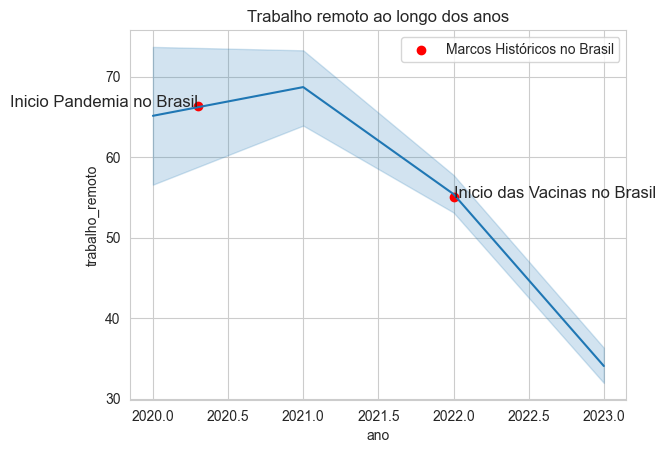

In [31]:

sns.lineplot(x='ano', y='trabalho_remoto', data=df_1)

# Coordenadas e legendas para os pontos que você deseja adicionar
ano1, valor1, legenda1 = 2020.3, 66.3, 'Inicio Pandemia no Brasil'
ano2, valor2, legenda2 = 2022.0, 55, 'Inicio das Vacinas no Brasil'

# Adicione os pontos com legendas
plt.scatter(x=[ano1, ano2], y=[valor1, valor2], color='red', marker='o', label='Marcos Históricos no Brasil')
plt.text(ano1, valor1, f'{legenda1}', fontsize=12, ha='right')
plt.text(ano2, valor2, f'{legenda2}', fontsize=12, ha='left')

plt.title('Trabalho remoto ao longo dos anos')
plt.legend()
plt.show()

- A analise acima foi desenvolvida para tentar estabelecer a correlação com a pandemia (COVID), os dados foram coletados a partir de 2020 quando a crise já havia se estabelecido em alguns países como EUA, por isso notamos a maior concentração de pessoas no modelo remoto em 2020. A vacina começou a ser distribuida no Brasil em meados de 2022, mas fora já havia começado a campanha de vacinação, por isso a queda é evidente antes dessa data.

6) Distribuição salarial com base no tipo de emprego (anual)

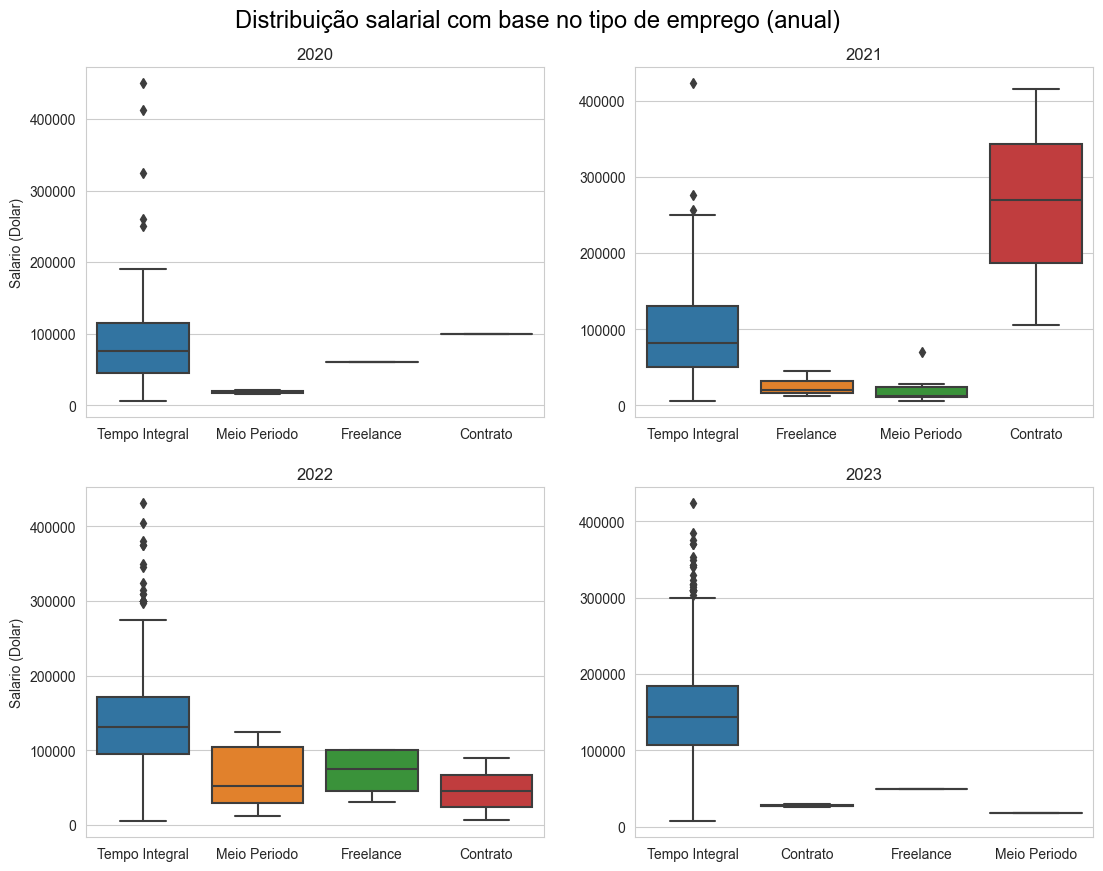

In [32]:
custom_palette = sns.color_palette("tab10")

fig, ax = plt.subplots(2,2, figsize= (13, 10)) 


data20 = df_1.loc[df_1['ano']==2020, ['tipo_emprego', 'salario_usd']]
x20, y20 = data20['tipo_emprego'], data20['salario_usd']
data21 = df_1.loc[df_1['ano']==2021, ['tipo_emprego', 'salario_usd']]
x21, y21 = data21['tipo_emprego'], data21['salario_usd']
data22 = df_1.loc[df_1['ano']==2022, ['tipo_emprego', 'salario_usd']]
x22, y22 = data22['tipo_emprego'], data22['salario_usd']
data23 = df_1.loc[df_1['ano']==2023, ['tipo_emprego', 'salario_usd']]
x23, y23 = data23['tipo_emprego'], data23['salario_usd']

sns.set(rc={'xtick.labelsize':10,
            'ytick.labelsize':10})

plt.gcf().text(.24, .92,       
               "Distribuição salarial com base no tipo de emprego (anual)",   
               fontsize = 17, 
               color='Black')

sns.boxplot(ax=ax[0,0], x=x20, y=y20, palette=custom_palette).set(title=('2020'), xlabel=(''), ylabel=('Salario (Dolar)'))
sns.boxplot(ax=ax[0,1], x=x21, y=y21, palette=custom_palette).set(title=('2021'), xlabel=(''), ylabel=(''))
sns.boxplot(ax=ax[1,0], x=x22, y=y22, palette=custom_palette).set(title=('2022'), xlabel=(''), ylabel=('Salario (Dolar)'))
sns.boxplot(ax=ax[1,1], x=x23, y=y23, palette=custom_palette).set(title=('2023'), xlabel=(''), ylabel=(''))

plt.show() 

- Foi analisado a distribuição salarial por ano, considerando o modelo de trabalho dos respondentes. É possivel notar que no começo da pandemia (2020) muitas pessoas ainda trabalhavam em tempo integral, com o auge da crise o mercado encontrou como saída o modelo de Contrato (2021), no entanto ele apresentava custos muito elevados e foi adpatado para modalidades como freelance e meio periodo (2022), com o fim da pandemia retornamos ao modelo antes ja praticado de tempo integral (2023). 

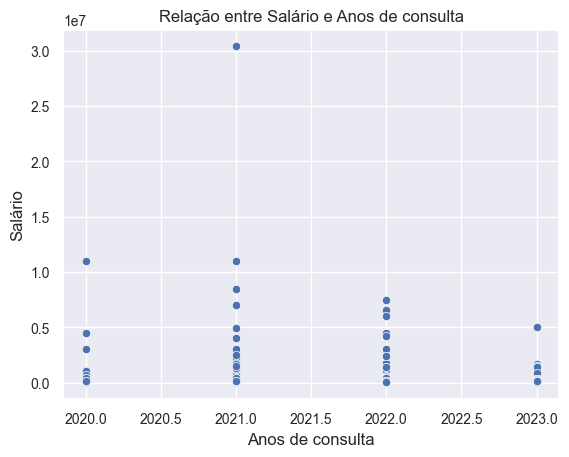

In [33]:
# Gráfico de dispersão entre salário e anos de consulta

sns.scatterplot(x='ano', y='salario', data=df_1)
plt.xlabel('Anos de consulta')
plt.ylabel('Salário')
plt.title('Relação entre Salário e Anos de consulta')
plt.show()


In [34]:
df = df_1
df.columns

Index(['ano', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario', 'moeda',
       'salario_usd', 'país_residencia', 'trabalho_remoto', 'país_empregador',
       'tamanho_empresa'],
      dtype='object')

In [35]:
# Agrupando por nível de experiencia tamanho da empresa e fazendo a media dos salarios
df.groupby(['nivel_experiencia', 'tamanho_empresa'], as_index= True ).agg( salario_mean = ('salario_usd', 'mean')).round(2)

salario_mean
nivel_experiencia tamanho_empresa              
Diretor           L                   165363.15
                  M                   198857.28
                  S                   196827.17
Junior            L                    72896.81
                  M                    87416.46
                  S                    59120.73
Pleno             L                    89135.73
                  M                   111586.42
                  S                    58080.50
Senior            L                   156159.69
                  M                   153643.33
                  S                   106875.47

In [36]:
# Selecionando os dados para plotar
df_plot = df.groupby(['nivel_experiencia', 'tamanho_empresa'], as_index= False ).agg( salario_mean = ('salario_usd', 'mean')).round(2)

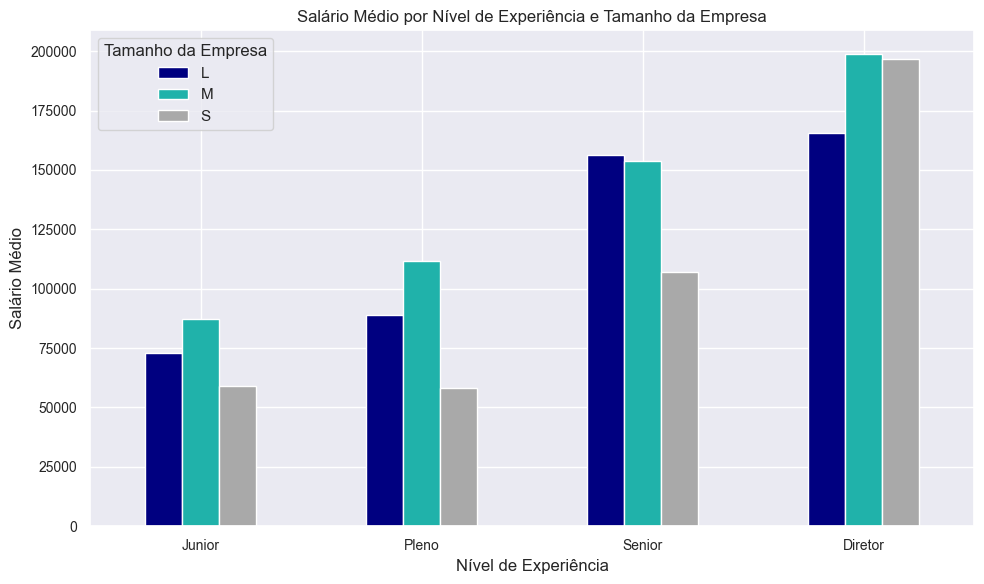

In [37]:
# Criando o gráfico de barras agrupadas
order = ['Junior', 'Pleno', 'Senior', 'Diretor']
pivot_df = df_plot.pivot(index='nivel_experiencia', columns='tamanho_empresa', values='salario_mean')
pivot_df = pivot_df.reindex(order)

colors = ['navy', 'lightseagreen', 'darkgray']

ax = pivot_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio')
plt.title('Salário Médio por Nível de Experiência e Tamanho da Empresa')
plt.xticks(rotation=0)
plt.legend(title='Tamanho da Empresa')
plt.tight_layout()
plt.show()

In [38]:
# Agrupando por nível de experiencia tamanho da empresa e fazendo a contagem da quantidade de salarios
df.groupby(['nivel_experiencia', 'tamanho_empresa'], as_index= True ).agg( salario_mean = ('salario_usd', 'count'))

salario_mean
nivel_experiencia tamanho_empresa              
Diretor           L                          13
                  M                          95
                  S                           6
Junior            L                         100
                  M                         171
                  S                          49
Pleno             L                         134
                  M                         621
                  S                          50
Senior            L                         207
                  M                        2266
                  S                          43

In [39]:
# Selecionando os cargos com as maiores quantidades de dados
cargo_count_salarios = df.groupby('cargo', as_index= False).agg(salario_count = ('salario_usd', 'count')).sort_values('salario_count', ascending= False).head(5)
cargo_count_salarios

,cargo,salario_count
33,Data Engineer,1040
47,Data Scientist,840
25,Data Analyst,612
69,Machine Learning Engineer,289
4,Analytics Engineer,103


In [40]:
# Cargos unicos
cargos_filtrados = cargo_count_salarios.cargo.unique()
cargos_filtrados

array(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer'], dtype=object)

In [41]:
# Selecionando os dados para plotar
df_plot = df[['nivel_experiencia', 'cargo', 'salario_usd']].loc[df['cargo'].isin(cargos_filtrados)]

In [42]:
# Configuração dos gráficos
palette = sns.color_palette(['darkcyan', 'midnightblue', 'mediumaquamarine', 'darkslategray', 'powderblue'])
order = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

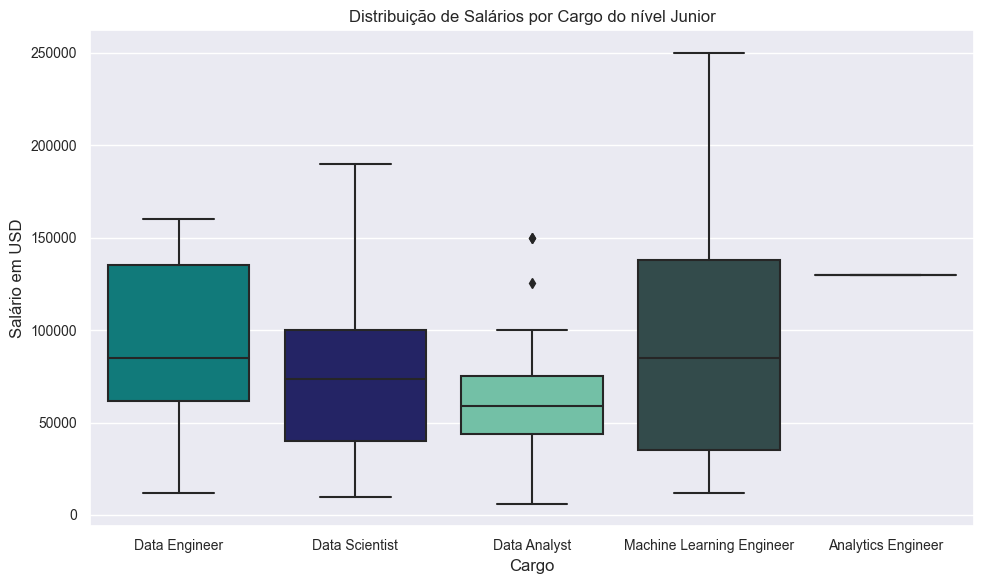

In [43]:
# Selecionando os dados para plotar
data = df_plot[df_plot.nivel_experiencia == 'Junior']

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data, x= 'cargo', y = 'salario_usd', palette = palette, order = order)
plt.xlabel('Cargo')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Cargo do nível Junior')
plt.tight_layout()
plt.show()

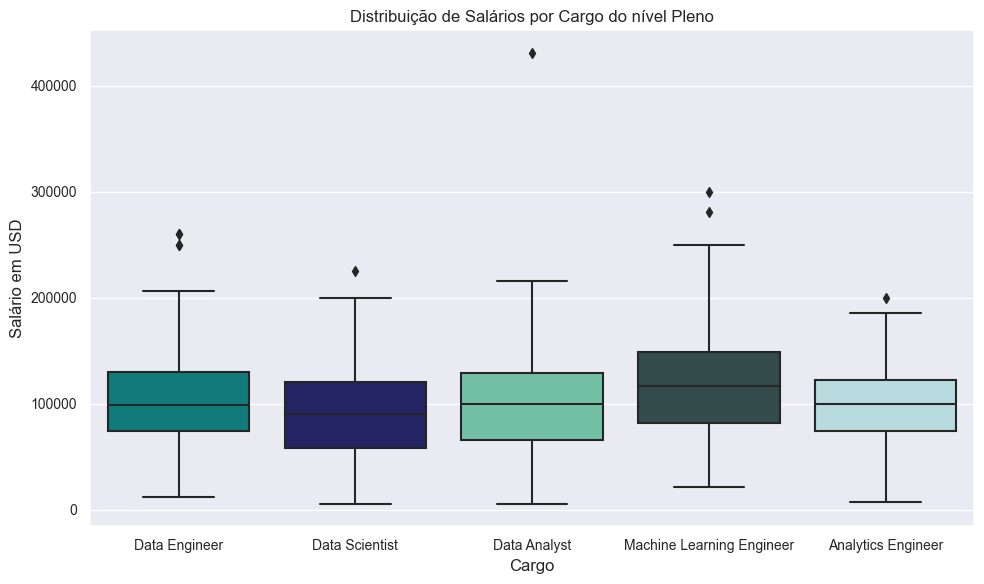

In [44]:
# Selecionando os dados para plotar
data = df_plot[df_plot.nivel_experiencia == 'Pleno']

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data, x= 'cargo', y = 'salario_usd', palette = palette, order = order)
plt.xlabel('Cargo')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Cargo do nível Pleno')
plt.tight_layout()
plt.show()

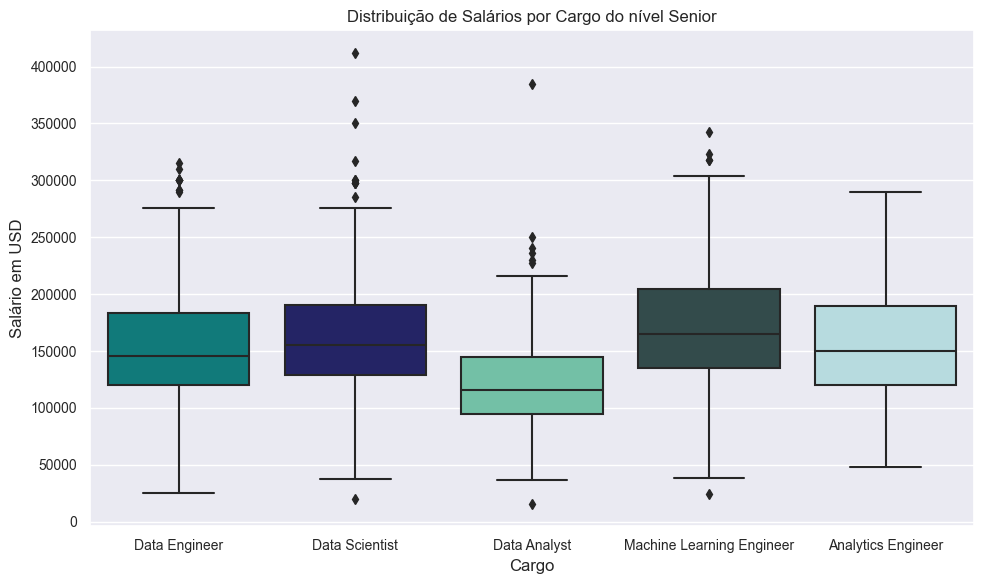

In [45]:
# Selecionando os dados para plotar
data = df_plot[df_plot.nivel_experiencia == 'Senior']

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data, x= 'cargo', y = 'salario_usd', palette = palette, order = order)
plt.xlabel('Cargo')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Cargo do nível Senior')
plt.tight_layout()
plt.show()

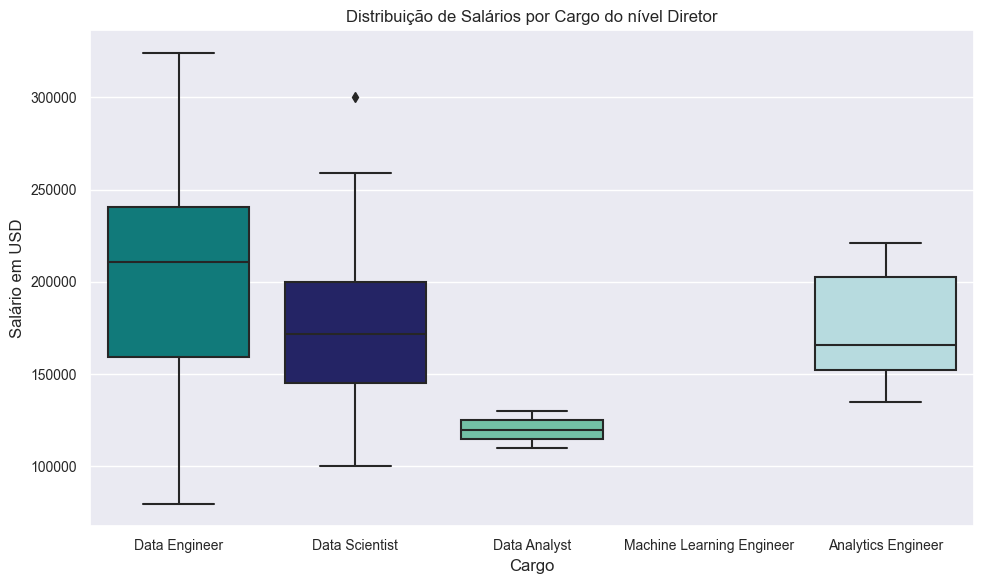

In [46]:
# Selecionando os dados para plotar
data = df_plot[df_plot.nivel_experiencia == 'Diretor']

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data, x= 'cargo', y = 'salario_usd', palette = palette, order = order)
plt.xlabel('Cargo')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Cargo do nível Diretor')
plt.tight_layout()
plt.show()

In [68]:
df.columns

Index(['ano', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario', 'moeda',
       'salario_usd', 'país_residencia', 'trabalho_remoto', 'país_empregador',
       'tamanho_empresa'],
      dtype='object')

In [70]:
# Ordenando o DataFrame pelo salário em ordem decrescente e selecionar os 10 maiores salários
top_10_salarios = df.sort_values(by='salario_usd', ascending=False).head(10).reset_index()

# Exibir os 10 maiores salários com os cargos e níveis de experiência correspondentes
top_10_salarios[['cargo', 'nivel_experiencia', 'salario_usd', 'país_empregador', 'moeda', 'tipo_emprego']]

,cargo,nivel_experiencia,salario_usd,país_empregador,moeda,tipo_emprego
0,Research Scientist,Pleno,450000,US,USD,Tempo Integral
1,Data Analyst,Pleno,430967,GB,GBP,Tempo Integral
2,AI Scientist,Senior,423834,IL,ILS,Tempo Integral
3,Applied Machine Learning Scientist,Pleno,423000,US,USD,Tempo Integral
4,Principal Data Scientist,Diretor,416000,US,USD,Contrato
5,Data Scientist,Senior,412000,US,USD,Tempo Integral
6,Data Analytics Lead,Senior,405000,US,USD,Tempo Integral
7,Data Analyst,Senior,385000,US,USD,Tempo Integral
8,Applied Data Scientist,Senior,380000,US,USD,Tempo Integral
9,Data Architect,Senior,376080,US,USD,Tempo Integral


In [119]:
df.país_empregador.unique()

array(['ESP', 'USA', 'CAN', 'DEU', 'GBR', 'NGA', 'IND', 'HKG', 'NLD',
       'CHE', 'CAF', 'FRA', 'FIN', 'UKR', 'IRL', 'ISR', 'GHA', 'COL',
       'SGP', 'AUS', 'SWE', 'SVN', 'MEX', 'BRA', 'PRT', 'RUS', 'THA',
       'HRV', 'VNM', 'EST', 'ARM', 'BIH', 'KEN', 'GRC', 'MKD', 'LVA',
       'ROU', 'PAK', 'ITA', 'MAR', 'POL', 'ALB', 'ARG', 'LTU', 'ASM',
       'CRI', 'IRN', 'BHS', 'HUN', 'AUT', 'SVK', 'CZE', 'TUR', 'PRI',
       'DNK', 'BOL', 'PHL', 'BEL', 'IDN', 'EGY', 'ARE', 'LUX', 'MYS',
       'HND', 'JPN', 'DZA', 'IRQ', 'CHN', 'NZL', 'CHL', 'MDA', 'MLT'],
      dtype=object)

In [90]:
siglas = {'ES': 'ESP', 'US': 'USA', 'CA': 'CAN', 'DE': 'DEU', 'GB': 'GBR', 'NG': 'NGA', 'IN': 'IND', 'HK': 'HKG', 'NL': 'NLD', 'CH': 'CHE', 'CF': 'CAF', 'FR': 'FRA', 'FI': 'FIN', 'UA': 'UKR', 'IE': 'IRL', 'IL': 'ISR', 'GH': 'GHA', 'CO': 'COL', 'SG': 'SGP', 'AU': 'AUS', 'SE': 'SWE', 'SI': 'SVN', 'MX': 'MEX', 'BR': 'BRA', 'PT': 'PRT', 'RU': 'RUS', 'TH': 'THA', 'HR': 'HRV', 'VN': 'VNM', 'EE': 'EST', 'AM': 'ARM', 'BA': 'BIH', 'KE': 'KEN', 'GR': 'GRC', 'MK': 'MKD', 'LV': 'LVA', 'RO': 'ROU', 'PK': 'PAK', 'IT': 'ITA', 'MA': 'MAR', 'PL': 'POL', 'AL': 'ALB', 'AR': 'ARG', 'LT': 'LTU', 'AS': 'ASM', 'CR': 'CRI', 'IR': 'IRN', 'BS': 'BHS', 'HU': 'HUN', 'AT': 'AUT', 'SK': 'SVK', 'CZ': 'CZE', 'TR': 'TUR', 'PR': 'PRI', 'DK': 'DNK', 'BO': 'BOL', 'PH': 'PHL', 'BE': 'BEL', 'ID': 'IDN', 'EG': 'EGY', 'AE': 'ARE', 'LU': 'LUX', 'MY': 'MYS', 'HN': 'HND', 'JP': 'JPN', 'DZ': 'DZA', 'IQ': 'IRQ', 'CN': 'CHN', 'NZ': 'NZL', 'CL': 'CHL', 'MD': 'MDA', 'MT': 'MLT'}

In [120]:
# Mapear as siglas para nomes oficiais no DataFrame
df['país_empregador'] = df['país_empregador'].replace(siglas)
df.head()

,ano,nivel_experiencia,tipo_emprego,cargo,salario,moeda,salario_usd,país_residencia,trabalho_remoto,país_empregador,tamanho_empresa
0,2023,Senior,Tempo Integral,Principal Data Scientist,80000,EUR,85847,ES,100,ESP,L
1,2023,Pleno,Contrato,ML Engineer,30000,USD,30000,US,100,USA,S
2,2023,Pleno,Contrato,ML Engineer,25500,USD,25500,US,100,USA,S
3,2023,Senior,Tempo Integral,Data Scientist,175000,USD,175000,CA,100,CAN,M
4,2023,Senior,Tempo Integral,Data Scientist,120000,USD,120000,CA,100,CAN,M


In [122]:
df_pais_empregador_senior = df[df.nivel_experiencia == 'Senior'].groupby('país_empregador', as_index= False).agg(media = ('salario_usd', 'mean'))

In [112]:
world = gpd.read_file('../utils/georef/world_countries.shp')
world.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,í¼ì§,Fiji,FidÅ¼i,Fiji,Ð¤Ð¸Ð´Ð¶Ð¸,Fiji,Fiji,Fiji,ææ¿,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,íìëì,Tanzania,Tanzania,TanzÃ¢nia,Ð¢Ð°Ð½Ð·Ð°Ð½Ð¸Ñ,Tanzania,Tanzanya,Tanzania,å¦æ¡å°¼äº,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [114]:
world.loc[world['SOV_A3'] == 'US1', 'SOV_A3'] = 'USA'

In [123]:
world_senior = world.merge(df_pais_empregador_senior, left_on='SOV_A3', right_on='país_empregador', how='left')
world_senior.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,país_empregador,media
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,FidÅ¼i,Fiji,Ð¤Ð¸Ð´Ð¶Ð¸,Fiji,Fiji,Fiji,ææ¿,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Tanzania,TanzÃ¢nia,Ð¢Ð°Ð½Ð·Ð°Ð½Ð¸Ñ,Tanzania,Tanzanya,Tanzania,å¦æ¡å°¼äº,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN


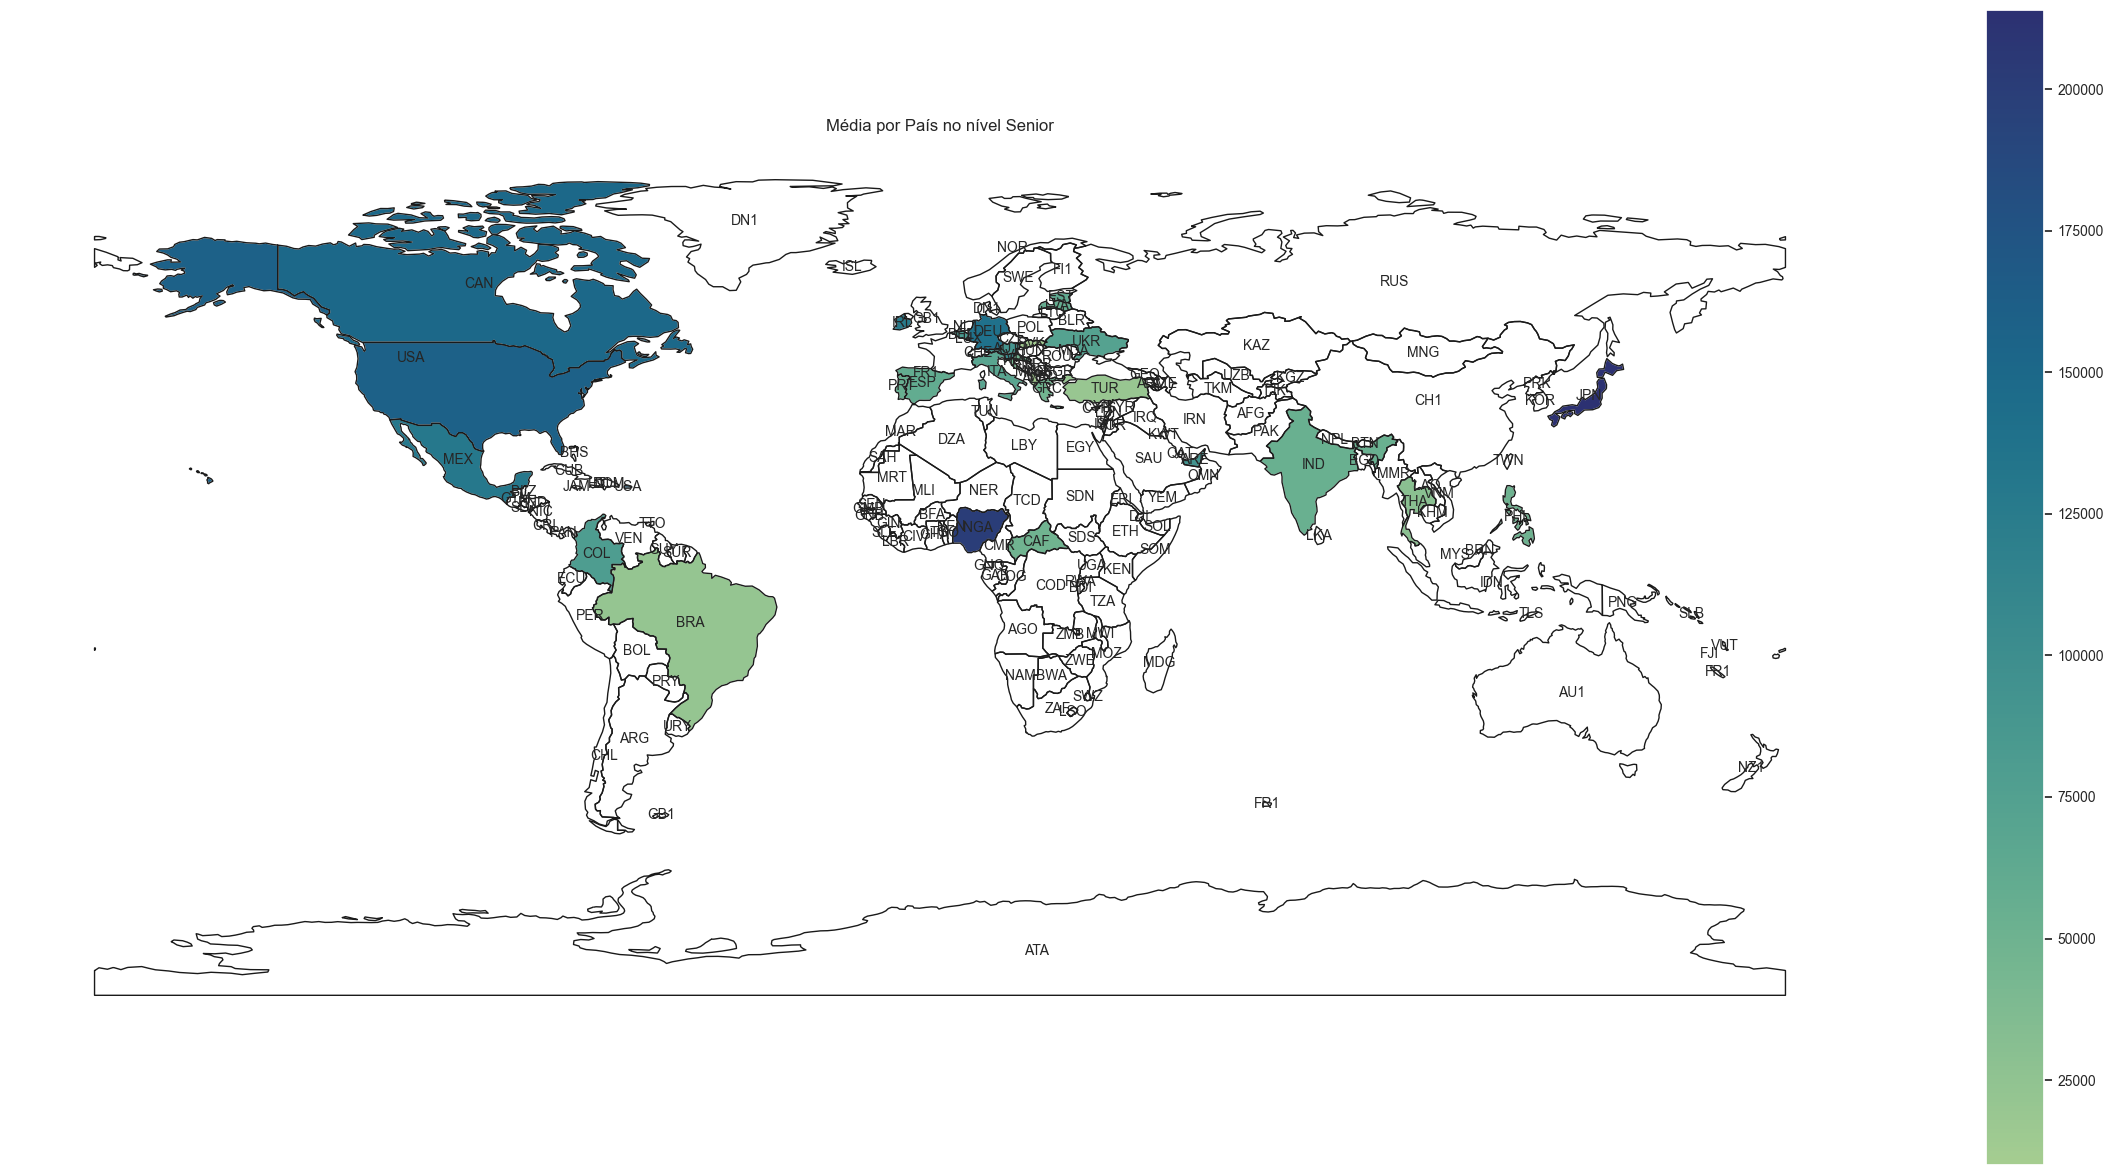

In [127]:
# Plotando o mapa
fig, ax = plt.subplots(1, figsize=(30, 15))
world.boundary.plot(ax=ax, linewidth=1, color='k')  # Contorno dos países
world_senior.plot(column='media', cmap=sns.color_palette("crest", as_cmap=True), ax=ax, legend=True)

# Adicionando rótulos de texto para os estados
for x, y, label in zip(world_senior.geometry.centroid.x, world_senior.geometry.centroid.y, world_senior['SOV_A3']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

# Configurações adicionais do gráfico
plt.title('Média por País no nível Senior')
plt.axis('off')  # Oculta os eixos
plt.show()

In [47]:
df.columns

Index(['ano', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario', 'moeda',
       'salario_usd', 'país_residencia', 'trabalho_remoto', 'país_empregador',
       'tamanho_empresa'],
      dtype='object')

In [60]:
# Selecionando os dados para plotar
df_filtrado = df[df['cargo'].isin(cargos_filtrados)]
media_salarios = df_filtrado[df_filtrado.nivel_experiencia == 'Senior'].groupby(['cargo', 'ano'])['salario_usd'].mean().round(2)..reset_index()
media_salarios

,cargo,ano,salario_usd
0,Analytics Engineer,2022,146813.74
1,Analytics Engineer,2023,169166.43
2,Data Analyst,2021,96769.50
3,Data Analyst,2022,114062.09
4,Data Analyst,2023,125788.94
5,Data Engineer,2020,89803.33
6,Data Engineer,2021,140326.45
7,Data Engineer,2022,148323.76
8,Data Engineer,2023,159132.21
9,Data Scientist,2020,172916.25


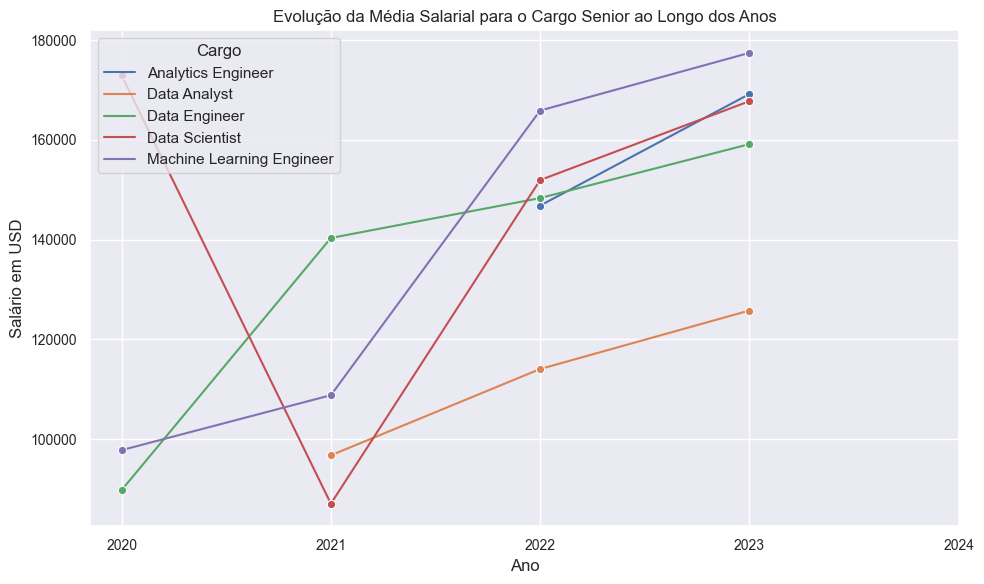

In [63]:
# Criando gráfico de linhas
plt.figure(figsize=(10, 6))
sns.lineplot(data=media_salarios, x='ano', y='salario_usd', hue='cargo', marker='o')
plt.xlabel('Ano')
plt.ylabel('Salário em USD')
plt.title('Evolução da Média Salarial para o Cargo Senior ao Longo dos Anos')
plt.grid(True)
plt.xticks([2020, 2021, 2022, 2023, 2024])
plt.tight_layout()

# Exibir o gráfico
plt.legend(title='Cargo', loc='upper left')
plt.show